In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use('seaborn')
sns.set(font_scale = 2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [8]:
dataframe = pd.read_json("E:\\GithubProjects\\Programming-Helper\\Wakgood-Analysis\\Output.json")

In [10]:
dataframe.head()

,Index,Header,ContentTitle,ContentID,ContentCommentCount,ContentDate,ContentView
0,3774,False,얘들아,8591227,1151,15:40,"7,993"
1,3773,False,[11.22.화] 고정멤버 주식대회 마지막 투자! (변경되었습니다),8584607,220,2022.11.21.,"8,324"
2,3772,False,VR챗 예능 프로그램 메타 시그널 참가 패널 발표,8582401,271,2022.11.21.,1.3만
3,3771,False,오늘의 표지왕,8559610,169,2022.11.20.,"7,370"
4,3770,False,[12.1.목] 고멤 아카데미 오디션 3일차 일정 안내,8558267,277,2022.11.20.,1.7만


In [25]:
for i, rows in dataframe.iterrows():
	Temp = rows['ContentView'].replace(',','')
	if "만" in Temp:
		Temp = int(float(Temp.replace('만','')) * 10000)
	else:
		Temp = int(Temp)
	dataframe['ContentView'][i] = Temp

In [26]:
dataframe.head()

,Index,Header,ContentTitle,ContentID,ContentCommentCount,ContentDate,ContentView
0,3774,False,얘들아,8591227,1151,15:40,7993
1,3773,False,[11.22.화] 고정멤버 주식대회 마지막 투자! (변경되었습니다),8584607,220,2022.11.21.,8324
2,3772,False,VR챗 예능 프로그램 메타 시그널 참가 패널 발표,8582401,271,2022.11.21.,13000
3,3771,False,오늘의 표지왕,8559610,169,2022.11.20.,7370
4,3770,False,[12.1.목] 고멤 아카데미 오디션 3일차 일정 안내,8558267,277,2022.11.20.,17000


https://kr.calc-date.com/index.php  
2827

In [28]:
dataframe['ContentView'].sum()/dataframe['ContentView'].count()
# 평균 조회수

7236.439321674616

In [39]:
MaxView = dataframe['ContentView'].max()
MinView = dataframe['ContentView'].min()

print(f"최대 조회수 : {MaxView} / 제목 : {dataframe[dataframe['ContentView'] == MaxView]['ContentTitle']}")
print(f"최소 조회수 : {MinView} / 제목 : {dataframe[dataframe['ContentView'] == MinView]['ContentTitle']}")

최대 조회수 : 690000 / 제목 : 1537    ☆★ 활 정 기 준 + 신 고 방 법☆★
Name: ContentTitle, dtype: object
최소 조회수 : 88 / 제목 : 3523         트위치 시청시 화질 질문이요!
3726    아르마3 또 새로운 맵 "탱크 마스터"
Name: ContentTitle, dtype: object


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


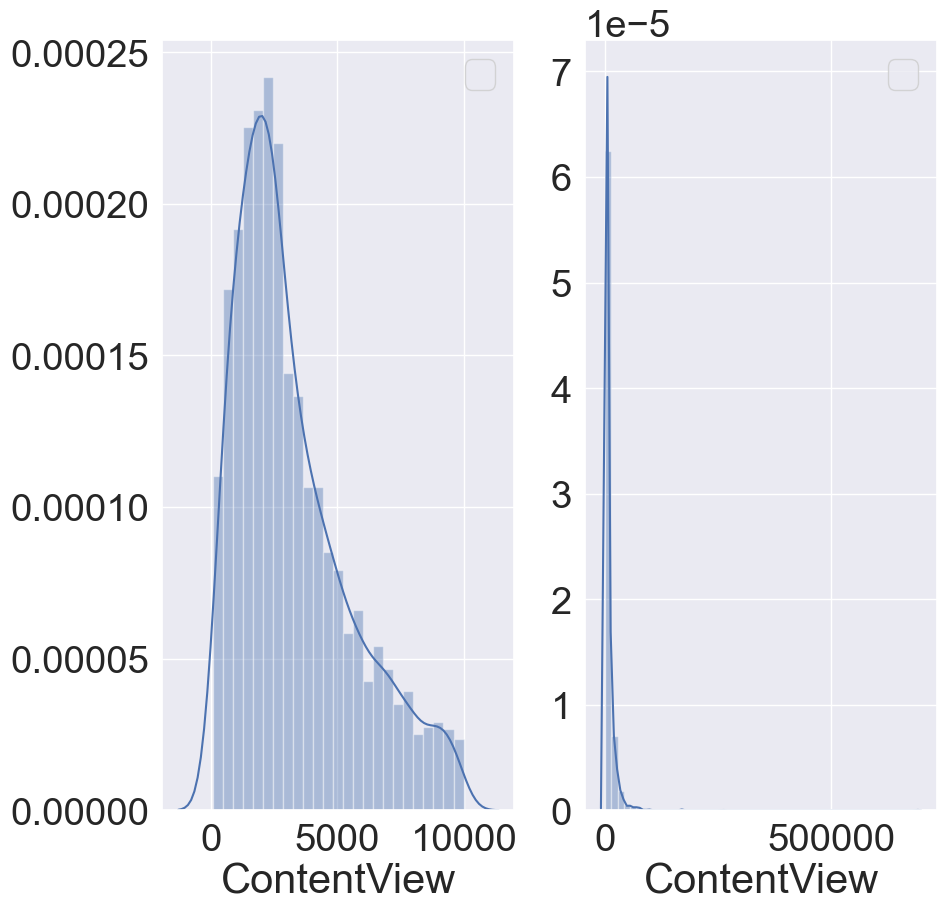

In [45]:
f, ax = plt.subplots(1, 2, figsize=(10 ,10))

g = sns.distplot(dataframe[dataframe['ContentView'] < 10000]['ContentView'], color='b', ax = ax[0])
g = g.legend(loc='best')

g = sns.distplot(dataframe['ContentView'], color='b', ax = ax[1])
g = g.legend(loc='best')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


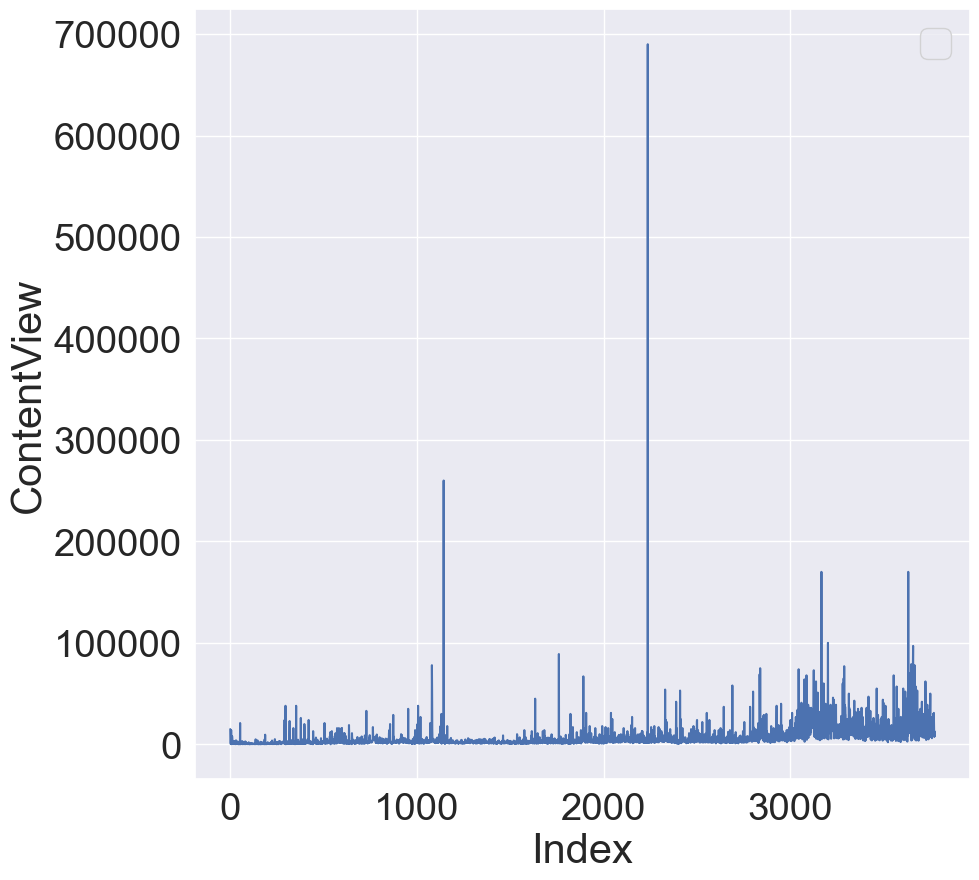

In [72]:
f, ax = plt.subplots(1, 1, figsize=(10 ,10))

g = sns.lineplot(data=dataframe, 
				y="ContentView",
				x="Index", 
				color='b', 
				ax = ax)
g = g.legend(loc='best')